In [5]:
%matplotlib inline

In [6]:
import pandas as pd

# Organizando o DataFrame

In [176]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1XROGI9ZaUX711MjWiyEMv4U84lZFUcGW')

df.describe()

,area,ratio,height,azimuth,shell_wall,abs_wall,shell_roof,abs_roof,wwr_liv,wwr_dorm,u_window,shgc,open_factor,blind,mirror,dbt,phft,cgtt
count,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000,46696.000000
mean,99.978511,1.250207,2.999561,179.815230,3.500578,0.499902,2.499829,0.499911,0.499984,0.499829,4.249745,0.545054,0.649916,0.500000,0.500021,19.545268,62.510914,53.220002
std,30.036140,0.450105,0.300225,108.073401,1.708278,0.180116,1.118103,0.180159,0.180149,0.180090,0.870443,0.195143,0.150118,0.500005,0.500005,5.231057,24.477613,37.651261
min,48.050781,0.470381,2.480254,-7.108594,1.000000,0.188305,1.000000,0.188305,0.188305,0.188152,2.742736,0.207330,0.390254,0.000000,0.000000,10.833984,0.000000,0.000000
25%,73.949219,0.860381,2.739492,86.217187,2.000000,0.343695,1.000000,0.344305,0.344305,0.344152,3.496368,0.375835,0.520254,0.000000,0.000000,15.277763,52.107500,25.408398
50%,100.050781,1.250381,3.000254,179.817187,3.000000,0.499695,3.000000,0.500305,0.500305,0.499924,4.249264,0.545330,0.649746,0.500000,1.000000,19.550091,67.800000,43.156679
75%,125.949219,1.640381,3.259746,273.417188,5.000000,0.655695,3.000000,0.656305,0.656305,0.656152,5.003264,0.713835,0.780254,1.000000,1.000000,24.056050,80.750000,72.447225
max,151.949219,2.029238,3.519746,367.017187,6.000000,0.811695,4.000000,0.811695,0.811695,0.811695,5.757264,0.882835,0.909746,1.000000,1.000000,28.240114,100.000000,235.467685


In [177]:
# phft e cgtt são outputs
df[df.columns[:-2]].head()

,area,ratio,height,azimuth,shell_wall,abs_wall,shell_roof,abs_roof,wwr_liv,wwr_dorm,u_window,shgc,open_factor,blind,mirror,dbt
0,70.851562,0.620820,3.019297,246.178125,2,0.754109,1,0.749234,0.500609,0.231266,2.998242,0.379301,0.473789,0,0,17.176324
1,122.851562,0.620820,3.019297,246.178125,2,0.754109,1,0.749234,0.500609,0.231266,2.998242,0.379301,0.473789,0,0,17.176324
2,70.851562,1.007773,3.019297,246.178125,2,0.754109,1,0.749234,0.500609,0.231266,2.998242,0.379301,0.473789,0,0,17.176324
3,70.851562,0.620820,3.510859,246.178125,2,0.754109,1,0.749234,0.500609,0.231266,2.998242,0.379301,0.473789,0,0,17.176324
4,70.851562,0.620820,3.019297,264.459375,2,0.754109,1,0.749234,0.500609,0.231266,2.998242,0.379301,0.473789,0,0,17.176324


In [178]:
# o output do metamodelo será cgtt
df[df.columns[-1]].head()

0    50.950282
1    43.714164
2    49.524904
3    56.321885
4    50.948126
Name: cgtt, dtype: float64

In [179]:
# assim, separa-se as features e targets

features = df.copy()[df.columns[:-2]]
target = df.copy()[df.columns[-1]]

## Padronizações e transformações para RNA

In [180]:
# defining which features are qualitative and quantitative

qualitative = ['shell_wall','shell_roof','blind','mirror']
quantitative = ['area','ratio','height','azimuth','abs_wall','abs_roof','wwr_liv','wwr_dorm','u_window','shgc','open_factor','dbt']

In [181]:
def z_score_normalize(series):
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

In [182]:
for col in quantitative:
  features[col] = z_score_normalize(features[col])

features.head()

,area,ratio,height,azimuth,shell_wall,abs_wall,shell_roof,abs_roof,wwr_liv,wwr_dorm,u_window,shgc,open_factor,blind,mirror,dbt
0,-0.969730,-1.398313,0.065737,0.614054,2,1.411355,1,1.38391,0.003472,-1.491269,-1.437777,-0.849393,-1.173257,0,0,-0.452861
1,0.761518,-1.398313,0.065737,0.614054,2,1.411355,1,1.38391,0.003472,-1.491269,-1.437777,-0.849393,-1.173257,0,0,-0.452861
2,-0.969730,-0.538617,0.065737,0.614054,2,1.411355,1,1.38391,0.003472,-1.491269,-1.437777,-0.849393,-1.173257,0,0,-0.452861
3,-0.969730,-1.398313,1.703052,0.614054,2,1.411355,1,1.38391,0.003472,-1.491269,-1.437777,-0.849393,-1.173257,0,0,-0.452861
4,-0.969730,-1.398313,0.065737,0.783210,2,1.411355,1,1.38391,0.003472,-1.491269,-1.437777,-0.849393,-1.173257,0,0,-0.452861


In [183]:
for col in qualitative:

  unique = sorted(features[col].unique())
  
  for i in range(len(unique)-1):
    new_col = col+f'_{unique[i]}'
    features[new_col] = features[col].apply(lambda x: 1 if x == unique[i] else 0)
  features = features.drop(col, 1)

## Conferindo dataframe, definindo features e targets

In [184]:
features.head()

,area,ratio,height,azimuth,abs_wall,abs_roof,wwr_liv,wwr_dorm,u_window,shgc,...,shell_wall_1,shell_wall_2,shell_wall_3,shell_wall_4,shell_wall_5,shell_roof_1,shell_roof_2,shell_roof_3,blind_0,mirror_0
0,-0.969730,-1.398313,0.065737,0.614054,1.411355,1.38391,0.003472,-1.491269,-1.437777,-0.849393,...,0,1,0,0,0,1,0,0,1,1
1,0.761518,-1.398313,0.065737,0.614054,1.411355,1.38391,0.003472,-1.491269,-1.437777,-0.849393,...,0,1,0,0,0,1,0,0,1,1
2,-0.969730,-0.538617,0.065737,0.614054,1.411355,1.38391,0.003472,-1.491269,-1.437777,-0.849393,...,0,1,0,0,0,1,0,0,1,1
3,-0.969730,-1.398313,1.703052,0.614054,1.411355,1.38391,0.003472,-1.491269,-1.437777,-0.849393,...,0,1,0,0,0,1,0,0,1,1
4,-0.969730,-1.398313,0.065737,0.783210,1.411355,1.38391,0.003472,-1.491269,-1.437777,-0.849393,...,0,1,0,0,0,1,0,0,1,1


In [185]:
X = features
y = target


# Machine Learning


In [108]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPRegressor

In [186]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

## Treinamento RNA

In [25]:
params_ann = {
    'hidden_layer_sizes': [(32,64),(64,128),(32,64,128)],
    'activation': ['logistic','relu'],
    'batch_size': [32,64,128],
    'learning_rate_init': [0.005,0.01,0.05],
    'max_iter': [10000],
    'tol': [0.0001,0.0005,0.00005],
    'random_state': [0]
  }

begin = datetime.now()

reg_ann = MLPRegressor()

grid_reg_ann = GridSearchCV(estimator=reg_ann, param_grid=params_ann, n_jobs=19)
grid_reg_ann.fit(X_train, y_train)

end = datetime.now()
training_time_ann = end-begin

In [26]:
print(training_time_ann)

2:16:59.423874


In [138]:
# Configuracao de hiperparametros do melhor modelo
grid_reg_ann.best_params_

{'activation': 'relu',
 'batch_size': 128,
 'hidden_layer_sizes': (64, 128),
 'learning_rate_init': 0.01,
 'max_iter': 10000,
 'random_state': 0,
 'tol': 0.0001}

In [140]:
# R2 do melhor modelo com amostra de treino
grid_reg_ann.best_score_

0.9430086687857635

In [112]:
# numero de iteracoes do melhor modelo
best_ann.n_iter_

310

In [133]:
best_ann = grid_reg_ann.best_estimator_

In [139]:
print("The R² on training set: {:.4f}".format(r2_score(y_train, best_ann.predict(X_train))))
print("The R² on test set: {:.4f}".format(r2_score(y_test, best_ann.predict(X_test))))

rmse = (mean_squared_error(y_train, best_ann.predict(X_train)))**(1/2)
print("The RMSE on training set: {:.4f}".format(rmse))
rmse = (mean_squared_error(y_test, best_ann.predict(X_test)))**(1/2)
print("The RMSE on test set: {:.4f}".format(rmse))

mae = mean_absolute_error(y_train, best_ann.predict(X_train))
print("The mean absolute error (MAE) on training set: {:.4f}".format(mae))
mae = mean_absolute_error(y_test, best_ann.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

diff = y_train - best_ann.predict(X_train)
diff = (diff**2)**(1/2)
print("The AE95 on training set: {:.4f}".format(diff.quantile(.95)))
diff = y_test - best_ann.predict(X_test)
diff = (diff**2)**(1/2)
print("The AE95 on test set: {:.4f}".format(diff.quantile(.95)))

The R² on training set: 0.9749
The R² on test set: 0.9452
The RMSE on training set: 5.9748
The RMSE on test set: 8.7585
The mean absolute error (MAE) on training set: 4.2938
The mean absolute error (MAE) on test set: 5.9235
The AE95 on training set: 12.0531
The AE95 on test set: 18.8513


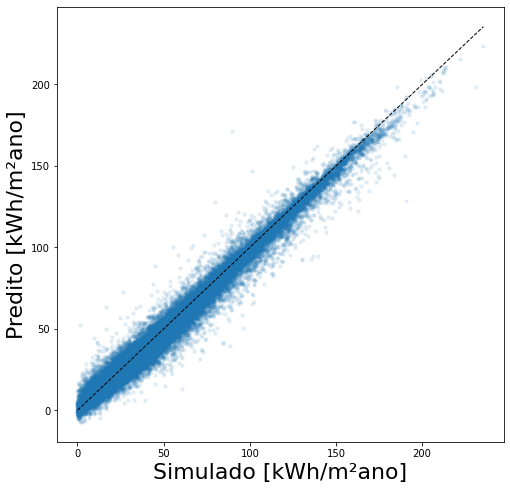

In [187]:
### plot amsotra treino
# fig = plt.figure(figsize=(12, 12))
# plt.subplot(1, 1, 1)
fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_train, best_ann.predict(X_train), s = 10, alpha = .1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Simulado [kWh/m²ano]',fontsize=22)
ax.set_ylabel('Predito [kWh/m²ano]',fontsize=22)
# fig.tight_layout()
plt.show()

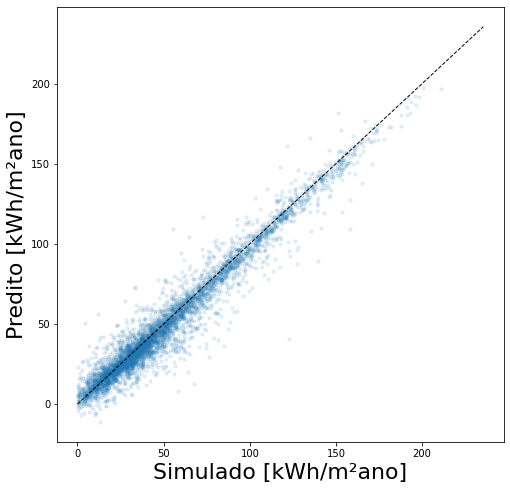

In [188]:
### amostra teste

fig, ax = plt.subplots(figsize= (8,8))
ax.scatter(y_test, best_ann.predict(X_test), s = 10, alpha = .1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Simulado [kWh/m²ano]',fontsize=22)
ax.set_ylabel('Predito [kWh/m²ano]',fontsize=22)
plt.show()

## Treinamento do GBM

In [36]:
params = {
    'max_depth': [3,5,7], 
    'n_estimators': [400,4000,40000],
    'min_samples_split': [2,50,100],
    'learning_rate': [0.005,0.01,0.05],  # [0.005,0.01,0.05],
    'loss': ['ls''lad','huber'],  # ],  # , 
    'random_state': [0] 
  }

begin = datetime.now()

reg = ensemble.GradientBoostingRegressor() # **params

grid_reg = GridSearchCV(estimator=reg, param_grid=params, n_jobs=19)
grid_reg.fit(X_train, y_train)

end = datetime.now()
training_time = end-begin

/home/marcelo/plutopy/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.68552203 0.91417222 0.98037067
 0.68552203 0.91420458 0.98025408 0.68552203 0.91401373 0.97990353
 0.79887319 0.96560698 0.98874014 0.79879838 0.96570338 0.98896666
 0.79873877 0.96474077 0.9889074  0.86508113 0.98227405 0.98826364
 0.86487194 0.98237671 0.98855295 0.86409019 0.98137198 0.98862466
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan  

In [37]:
print(training_time)

17:01:11.041949


In [38]:
grid_reg.best_params_

{'learning_rate': 0.05,
 'loss': 'huber',
 'max_depth': 5,
 'min_samples_split': 100,
 'n_estimators': 40000,
 'random_state': 0}

In [41]:
grid_reg.best_score_

0.9913550766077066

In [40]:
best_reg = grid_reg.best_estimator_

In [169]:
print("The R² on training set: {:.4f}".format(r2_score(y_train, best_reg.predict(X_train))))
print("The R² on test set: {:.4f}".format(r2_score(y_test, best_reg.predict(X_test))))

rmse = (mean_squared_error(y_train, best_reg.predict(X_train)))**(1/2)
print("The RMSE on training set: {:.4f}".format(rmse))
rmse = (mean_squared_error(y_test, best_reg.predict(X_test)))**(1/2)
print("The RMSE on test set: {:.4f}".format(rmse))

mae = mean_absolute_error(y_train, best_reg.predict(X_train))
print("The mean absolute error (MAE) on training set: {:.4f}".format(mae))
mae = mean_absolute_error(y_test, best_reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

diff = y_train - best_reg.predict(X_train)
diff = (diff**2)**(1/2)
print("The AE95 on training set: {:.4f}".format(diff.quantile(.95)))
diff = y_test - best_reg.predict(X_test)
diff = (diff**2)**(1/2)
print("The AE95 on test set: {:.4f}".format(diff.quantile(.95)))

The R² on training set: 0.9990
The R² on test set: 0.9913
The RMSE on training set: 1.1736
The RMSE on test set: 3.4838
The mean absolute error (MAE) on training set: 0.4824
The mean absolute error (MAE) on test set: 1.9789
The AE95 on training set: 1.5208
The AE95 on test set: 6.8850


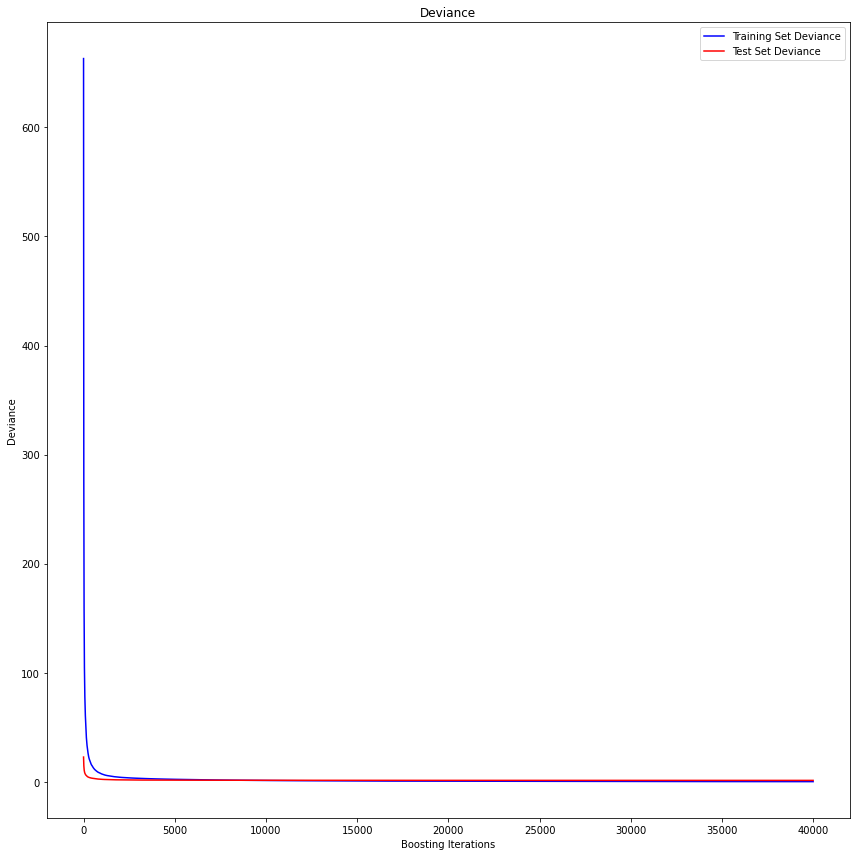

In [168]:
### treinamento

test_score = np.zeros((params['n_estimators'][-1],), dtype=np.float64)
for i, y_pred in enumerate(best_reg.staged_predict(X_test)):
    test_score[i] = best_reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(12, 12))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot((np.arange(params['n_estimators'][-1]) + 1), best_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot((np.arange(params['n_estimators'][-1]) + 1), test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

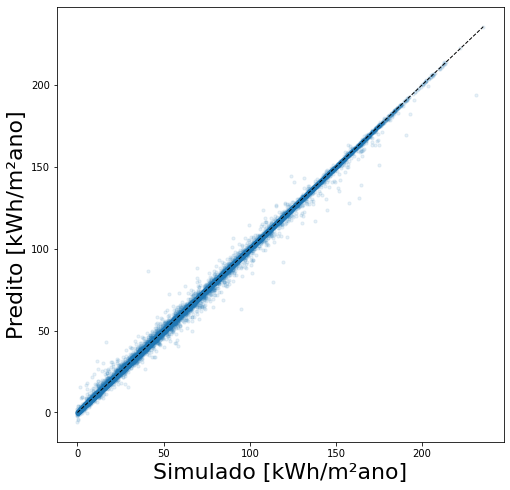

In [174]:
### amsotra treino

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_train, best_reg.predict(X_train), s = 10, alpha = .1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Simulado [kWh/m²ano]',fontsize=22)
ax.set_ylabel('Predito [kWh/m²ano]',fontsize=22)
plt.show()

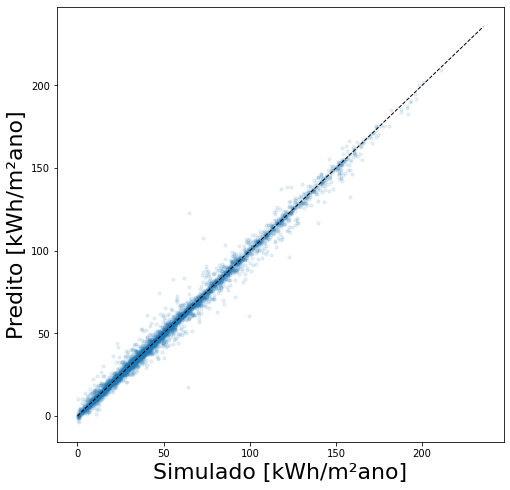

In [175]:
### amostra teste

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test, best_reg.predict(X_test), s = 10, alpha = .1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Simulado [kWh/m²ano]',fontsize=22)
ax.set_ylabel('Predito [kWh/m²ano]',fontsize=22)
plt.show()

## Salvando o modelo

In [17]:
import pickle

In [ ]:
filename = 'GBM_21-03-04_2.sav'
pickle.dump(grid_reg, open(filename, 'wb'))

In [ ]:
filename = 'ANN_21-03-04_2.sav'
pickle.dump(grid_reg_ann, open(filename, 'wb'))